Part I: Explaratory Data Analysis of CSV Files


=== Analysis for Customers Dataset ===

Summary Statistics:
                            join_date          last_purchase_date  \
count                           10000                       10000   
unique                            NaN                         NaN   
top                               NaN                         NaN   
freq                              NaN                         NaN   
mean    2022-03-19 09:28:13.439999744  2023-04-25 18:26:12.480000   
min               2020-01-01 00:00:00         2020-01-26 00:00:00   
25%               2021-02-15 00:00:00         2022-09-19 00:00:00   
50%               2022-03-19 00:00:00         2023-08-04 00:00:00   
75%               2023-04-28 00:00:00         2024-02-11 00:00:00   
max               2024-05-31 00:00:00         2024-05-31 00:00:00   
std                               NaN                         NaN   

                age gender    location  
count   8991.000000   9467       10000  
unique          NaN      2  

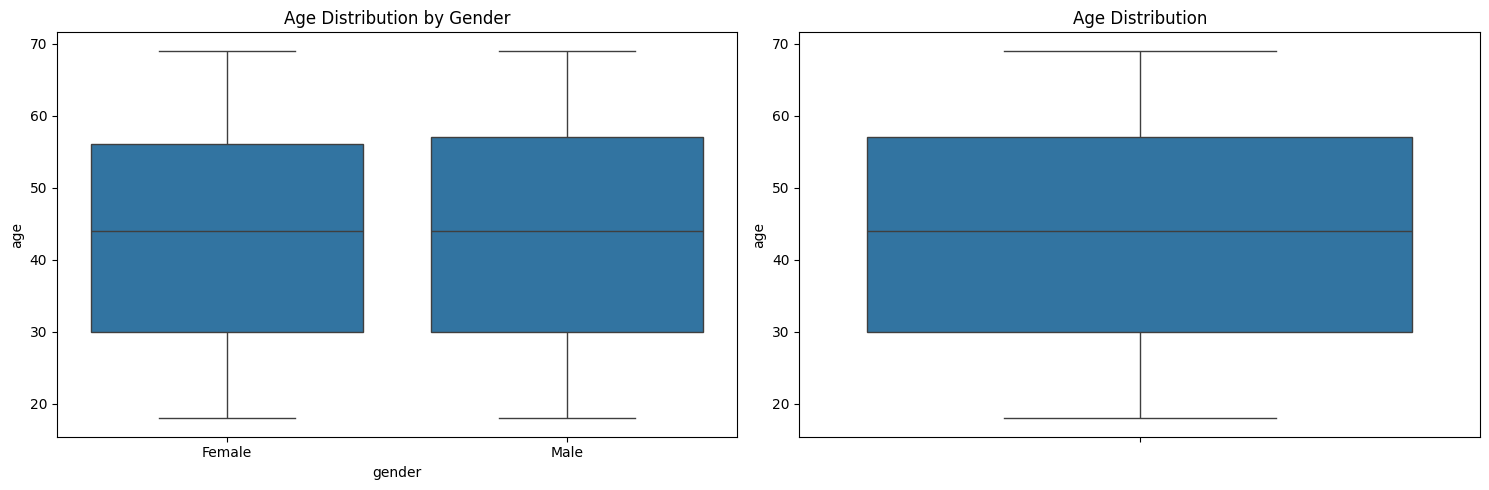

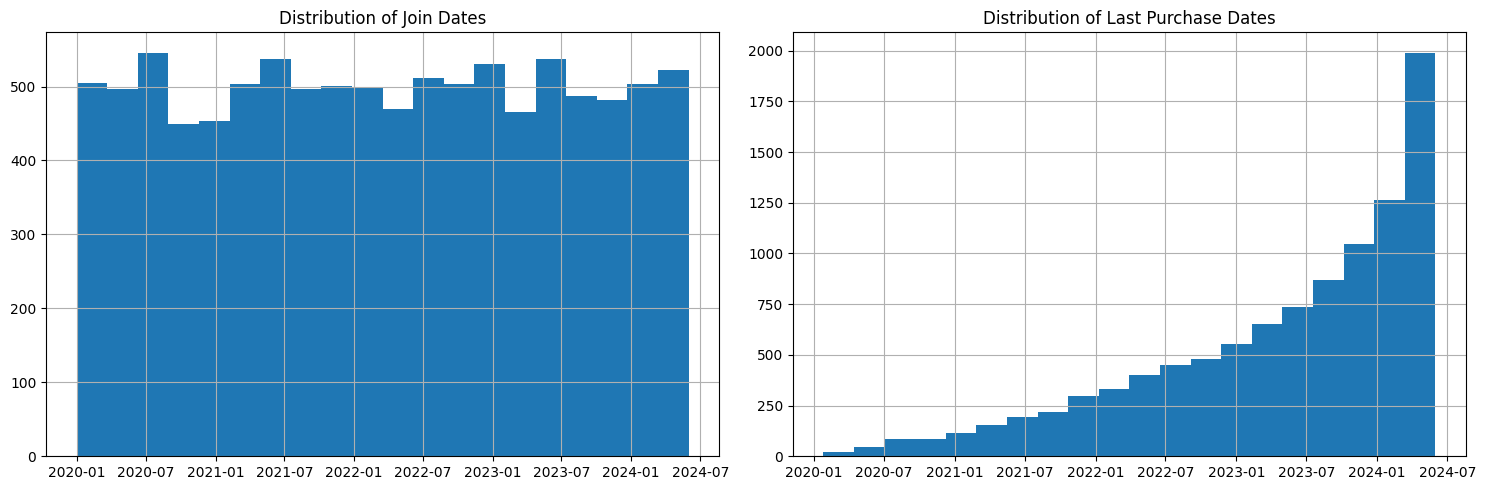


Null Values:
customer_id              0
join_date                0
last_purchase_date       0
age                   1009
gender                 533
location                 0
dtype: int64

=== Analysis for Transactions Dataset ===



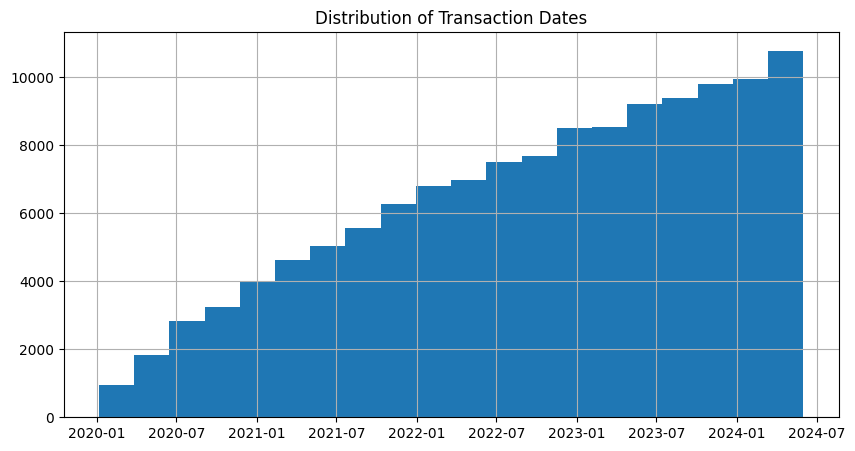

Summary Statistics:
        transaction_amount product_category
count        129545.000000           129545
unique                 NaN                3
top                    NaN      Electronics
freq                   NaN            43460
mean            597.287659              NaN
std             491.564174              NaN
min              10.020000              NaN
25%             228.320000              NaN
50%             438.380000              NaN
75%             846.980000              NaN
max            1999.990000              NaN

95th Percentile of Transaction Amount: 1707.46


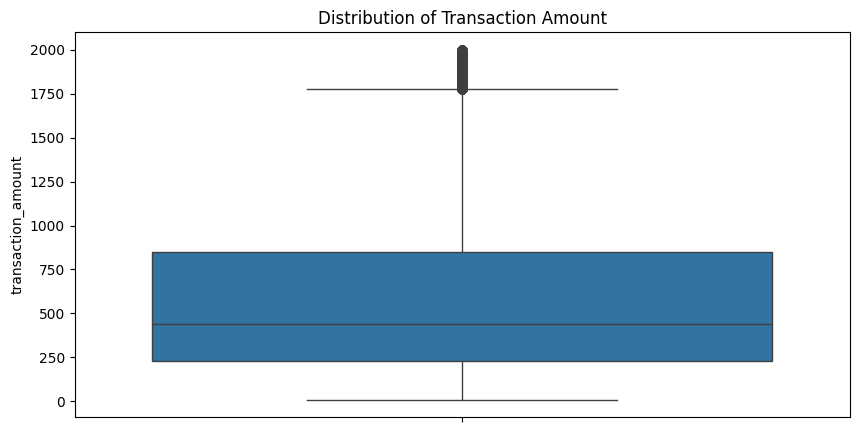

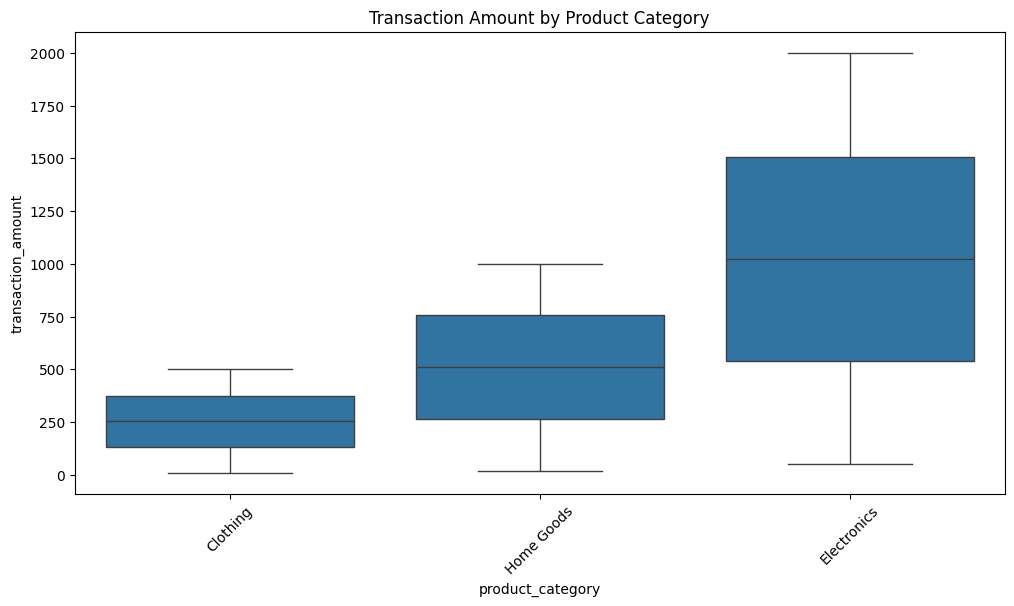


Null Values:
transaction_id        0
customer_id           0
transaction_date      0
transaction_amount    0
product_category      0
dtype: int64

=== Analysis for Engagements Dataset ===

Summary Statistics:
       number_of_site_visits  number_of_emails_opened  number_of_clicks
count           10000.000000             10000.000000      10000.000000
mean              100.111900                39.862100         19.725300
std               118.625052                46.511719         22.975083
min                 1.000000                 1.000000          1.000000
25%                15.000000                 6.000000          3.000000
50%                53.000000                22.000000         11.000000
75%               141.000000                57.000000         28.000000
max               711.000000               303.000000        142.000000

95th Percentiles:
number_of_site_visits: 363.00
number_of_emails_opened: 139.00
number_of_clicks: 69.05


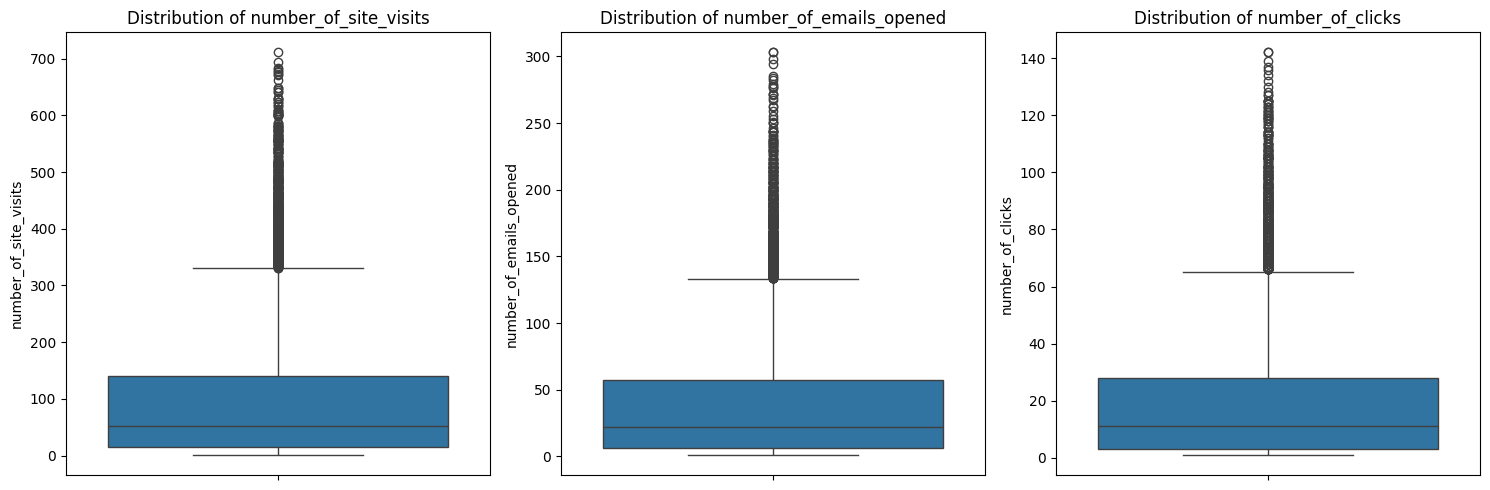


Null Values:
customer_id                0
number_of_site_visits      0
number_of_emails_opened    0
number_of_clicks           0
dtype: int64

=== Analysis for Marketing Dataset ===

Summary Statistics:
       response promotion_type                  campaign_date
count     25200          25200                          25200
unique        2              3                            NaN
top          No       Discount                            NaN
freq      12622           8430                            NaN
mean        NaN            NaN  2022-10-07 03:32:06.857142784
min         NaN            NaN            2020-01-06 00:00:00
25%         NaN            NaN            2021-12-12 00:00:00
50%         NaN            NaN            2022-12-01 00:00:00
75%         NaN            NaN            2023-09-15 00:00:00
max         NaN            NaN            2024-05-31 00:00:00


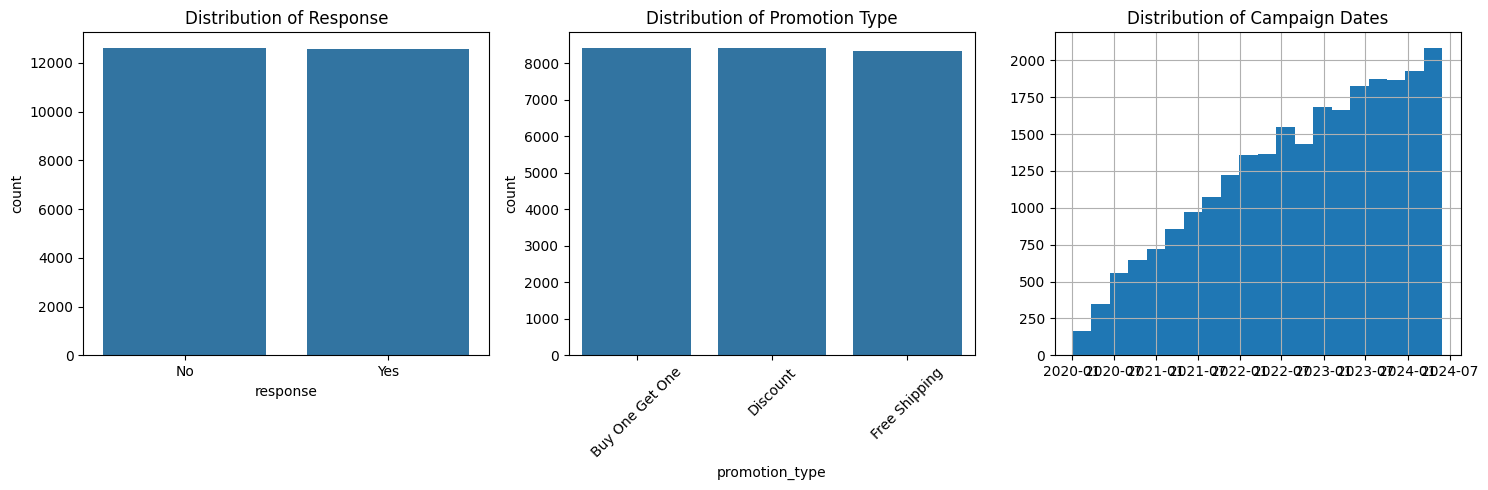


Null Values:
campaign_id       0
customer_id       0
response          0
promotion_type    0
campaign_date     0
dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_customers(url):
    print("\n=== Analysis for Customers Dataset ===\n")
    df = pd.read_csv(url)
    
    # Convert date columns to datetime
    df['join_date'] = pd.to_datetime(df['join_date'])
    df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])
    
    # Summary stats for specified columns
    print("Summary Statistics:")
    print(df[['join_date', 'last_purchase_date', 'age', 'gender', 'location']].describe(include='all'))
    
    # Boxplots for age and gender
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x='gender', y='age', data=df, ax=ax1)
    ax1.set_title('Age Distribution by Gender')
    sns.boxplot(y='age', data=df, ax=ax2)
    ax2.set_title('Age Distribution')
    plt.tight_layout()
    plt.show()
    
    # Distribution of date columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    df['join_date'].hist(ax=ax1, bins=20)
    ax1.set_title('Distribution of Join Dates')
    df['last_purchase_date'].hist(ax=ax2, bins=20)
    ax2.set_title('Distribution of Last Purchase Dates')
    plt.tight_layout()
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

def analyze_transactions(url):
    print("\n=== Analysis for Transactions Dataset ===\n")
    df = pd.read_csv(url)
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    
    # Distribution of transaction date
    plt.figure(figsize=(10, 5))
    df['transaction_date'].hist(bins=20)
    plt.title('Distribution of Transaction Dates')
    plt.show()
    
    # Summary stats for transaction amount and product category
    print("Summary Statistics:")
    print(df[['transaction_amount', 'product_category']].describe(include='all'))
    
    # 95th percentile for transaction amount
    print(f"\n95th Percentile of Transaction Amount: {df['transaction_amount'].quantile(0.95):.2f}")
    
    # Boxplot of transaction amount
    plt.figure(figsize=(10, 5))
    sns.boxplot(y='transaction_amount', data=df)
    plt.title('Distribution of Transaction Amount')
    plt.show()
    
    # Distribution of transaction amount by product category
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='product_category', y='transaction_amount', data=df)
    plt.title('Transaction Amount by Product Category')
    plt.xticks(rotation=45)
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

def analyze_engagements(url):
    print("\n=== Analysis for Engagements Dataset ===\n")
    df = pd.read_csv(url)
    
    columns = ['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks']
    
    # Summary stats and 95th percentile
    print("Summary Statistics:")
    print(df[columns].describe())
    
    print("\n95th Percentiles:")
    for col in columns:
        print(f"{col}: {df[col].quantile(0.95):.2f}")
    
    # Boxplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, col in enumerate(columns):
        sns.boxplot(y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

def analyze_marketing(url):
    print("\n=== Analysis for Marketing Dataset ===\n")
    df = pd.read_csv(url)
    
    columns = ['response', 'promotion_type', 'campaign_date']
    df['campaign_date'] = pd.to_datetime(df['campaign_date'])
    
    # Summary stats
    print("Summary Statistics:")
    print(df[columns].describe(include='all'))
    
    # Boxplots/distributions
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    sns.countplot(x='response', data=df, ax=axes[0])
    axes[0].set_title('Distribution of Response')
    
    sns.countplot(x='promotion_type', data=df, ax=axes[1])
    axes[1].set_title('Distribution of Promotion Type')
    axes[1].tick_params(axis='x', rotation=45)
    
    df['campaign_date'].hist(ax=axes[2], bins=20)
    axes[2].set_title('Distribution of Campaign Dates')
    
    plt.tight_layout()
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

# URLs of the datasets
urls = {
    'Customers': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv',
    'Transactions': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv',
    'Engagements': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv',
    'Marketing': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv'
}

# Analyze each dataset
analyze_customers(urls['Customers'])
analyze_transactions(urls['Transactions'])
analyze_engagements(urls['Engagements'])
analyze_marketing(urls['Marketing'])

Part II: Cleaning Data + Combining Data + Adding Features + Calculating CLV

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load the datasets
customers = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagements = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
transactions = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')
marketing = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')

# Clean customers_final file
customers = customers.dropna(subset=['gender'])
avg_age = int(customers['age'].mean())
customers['age'] = customers['age'].fillna(avg_age)
print(f"Remaining customers data: {len(customers)} rows")

# Clean engagement_final file
for col in ['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks']:
    p95 = engagements[col].quantile(0.95)
    engagements[col] = engagements[col].clip(upper=p95)
    print(f"95th percentile for {col}: {p95}")

# Clean marketing_final file
# Create dummy variables
marketing['responded_to_Buy_One_Get_One'] = ((marketing['promotion_type'] == 'Buy One Get One') & (marketing['response'] == 'Yes')).astype(int)
marketing['responded_to_Discount'] = ((marketing['promotion_type'] == 'Discount') & (marketing['response'] == 'Yes')).astype(int)
marketing['responded_to_Free_Shipping'] = ((marketing['promotion_type'] == 'Free Shipping') & (marketing['response'] == 'Yes')).astype(int)

# Create new columns for response dates
marketing['Buy_One_Get_One_response_date'] = np.where(marketing['responded_to_Buy_One_Get_One'] == 1, pd.to_datetime(marketing['campaign_date']), pd.NaT)
marketing['Discount_response_date'] = np.where(marketing['responded_to_Discount'] == 1, pd.to_datetime(marketing['campaign_date']), pd.NaT)
marketing['Free_Shipping_response_date'] = np.where(marketing['responded_to_Free_Shipping'] == 1, pd.to_datetime(marketing['campaign_date']), pd.NaT)

# Drop specified columns
marketing = marketing.drop(columns=['response', 'promotion_type', 'campaign_date', 'campaign_id'])

# Create Cleaned_Customers
cleaned_customers = customers.merge(marketing, on='customer_id', how='left')
cleaned_customers = cleaned_customers.merge(engagements, on='customer_id', how='left')

# Ensure date columns are in datetime format
date_columns = ['join_date', 'last_purchase_date', 'Buy_One_Get_One_response_date', 'Discount_response_date', 'Free_Shipping_response_date']
for col in date_columns:
    cleaned_customers[col] = pd.to_datetime(cleaned_customers[col])

# Group by customer_id and aggregate
cleaned_customers = cleaned_customers.groupby('customer_id').agg({
    'join_date': 'first',
    'last_purchase_date': 'first',
    'age': 'first',
    'gender': 'first',
    'location': 'first',
    'responded_to_Buy_One_Get_One': 'sum',
    'responded_to_Discount': 'sum',
    'responded_to_Free_Shipping': 'sum',
    'Buy_One_Get_One_response_date': 'max',
    'Discount_response_date': 'max',
    'Free_Shipping_response_date': 'max',
    'number_of_site_visits': 'first',
    'number_of_emails_opened': 'first',
    'number_of_clicks': 'first'
}).reset_index()

# Calculate Customer Life in Months
cleaned_customers['customer_life_months'] = (cleaned_customers['last_purchase_date'] - cleaned_customers['join_date']).dt.days / 30

# Clean transactions_final file
# Filter out customers that are filtered out in Customers_Final
transactions = transactions[transactions['customer_id'].isin(cleaned_customers['customer_id'])]

# Replace high outliers with 95th percentile
p95_transaction = transactions['transaction_amount'].quantile(0.95)
transactions['transaction_amount'] = transactions['transaction_amount'].clip(upper=p95_transaction)
print(f"95th percentile for transaction_amount: {p95_transaction}")

# Drop transaction_id
transactions = transactions.drop(columns=['transaction_id'])

# Ensure transaction_date is in the correct format
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

# Calculate total spend per customer
customer_spend = transactions.groupby('customer_id')['transaction_amount'].sum().reset_index()
customer_spend.columns = ['customer_id', 'Monetary']

# Merge total spend back to cleaned_customers
cleaned_customers = cleaned_customers.merge(customer_spend, on='customer_id', how='left')

# Calculate Monthly Spend
cleaned_customers['monthly_spend'] = cleaned_customers['Monetary'] / cleaned_customers['customer_life_months']

# Calculate Recency
reference_date = datetime(2024, 7, 5) # Assume that this frozen date is today for simplification purposes (and that it does not change when others run the code)
cleaned_customers['Recency'] = (reference_date - cleaned_customers['last_purchase_date']).dt.days

# Calculate Frequency
transaction_frequency = transactions.groupby('customer_id').size().reset_index(name='total_transactions')
cleaned_customers = cleaned_customers.merge(transaction_frequency, on='customer_id', how='left')
cleaned_customers['Frequency'] = cleaned_customers['total_transactions'] / cleaned_customers['customer_life_months']

# Calculate percentage of spend by product category
category_spend = transactions.groupby(['customer_id', 'product_category'])['transaction_amount'].sum().unstack(fill_value=0)
category_spend_pct = category_spend.div(category_spend.sum(axis=1), axis=0)
category_spend_pct.columns = [f'{col} %' for col in category_spend_pct.columns]

# Merge category spend percentages back to cleaned_customers
cleaned_customers = cleaned_customers.merge(category_spend_pct, on='customer_id', how='left')

# Save the cleaned datasets
cleaned_customers.to_csv(r'C:\Users\Numan\Desktop\Cleaned_Customers.csv', index=False)
transactions.to_csv(r'C:\Users\Numan\Desktop\Cleaned_Transactions.csv', index=False)

print("\nCleaned datasets have been saved to:")
print(r"C:\Users\Numan\Desktop\Cleaned_Customers.csv")
print(r"C:\Users\Numan\Desktop\Cleaned_Transactions.csv")

Remaining customers data: 9467 rows
95th percentile for number_of_site_visits: 363.0
95th percentile for number_of_emails_opened: 139.0
95th percentile for number_of_clicks: 69.04999999999927
95th percentile for transaction_amount: 1706.63

Cleaned datasets have been saved to:
C:\Users\Numan\Desktop\Cleaned_Customers.csv
C:\Users\Numan\Desktop\Cleaned_Transactions.csv


Part III: Trying 5 Machine Learning Models

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Load the data
url = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Assignments/Assignment%20II/Cleaned_Customers.csv"
df = pd.read_csv(url)

# Convert date columns to datetime
date_columns = ['join_date', 'last_purchase_date', 'Buy_One_Get_One_response_date', 
                'Discount_response_date', 'Free_Shipping_response_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Calculate time since joining
current_date = datetime.now()
df['days_since_joining'] = (current_date - df['join_date']).dt.days

# Calculate response time for promotions
for promo in ['Buy_One_Get_One', 'Discount', 'Free_Shipping']:
    df[f'{promo}_response_time'] = (df[f'{promo}_response_date'] - df['join_date']).dt.days

# Replace NaN with 0 for response time columns
response_time_columns = ['Buy_One_Get_One_response_time', 'Discount_response_time', 'Free_Shipping_response_time']
df[response_time_columns] = df[response_time_columns].fillna(0)

# Create age bins
df['age_bin'] = pd.cut(df['age'], bins=[17, 25, 35, 45, 55, 65, np.inf], 
                       labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Drop unnecessary columns
columns_to_drop = ['customer_id', 'location', 'join_date', 'last_purchase_date', 
                   'Buy_One_Get_One_response_date', 'Discount_response_date', 
                   'Free_Shipping_response_date']
df = df.drop(columns=columns_to_drop)

# Prepare features and target
X = df.drop('CLV', axis=1)
y = df['CLV']

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Prepare the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_val_pred = pipeline.predict(X_val)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train_val, y_train_val, cv=5, scoring='r2')
    
    results[name] = {
        'Validation MSE': val_mse,
        'Validation R2': val_r2,
        'Test MSE': test_mse,
        'Test R2': test_r2,
        'Cross-validation R2': cv_scores.mean()
    }

# Print results
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

c:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.089e+08, tolerance: 3.347e+07
  model = cd_fast.enet_coordinate_descent(
c:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.966e+08, tolerance: 3.546e+07
  model = cd_fast.enet_coordinate_descent(
c:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.172e+08, toler


Linear Regression:
Validation MSE: 29173080.4300
Validation R2: 0.4706
Test MSE: 33974577.5602
Test R2: 0.4453
Cross-validation R2: 0.4521

Ridge Regression:
Validation MSE: 29172979.4157
Validation R2: 0.4706
Test MSE: 33974996.9615
Test R2: 0.4453
Cross-validation R2: 0.4521

Lasso Regression:
Validation MSE: 29177071.7263
Validation R2: 0.4705
Test MSE: 33975058.4700
Test R2: 0.4453
Cross-validation R2: 0.4521

Random Forest:
Validation MSE: 14872.4503
Validation R2: 0.9997
Test MSE: 8463.7301
Test R2: 0.9999
Cross-validation R2: 0.9997

Gradient Boosting:
Validation MSE: 45075.3912
Validation R2: 0.9992
Test MSE: 23307.3070
Test R2: 0.9996
Cross-validation R2: 0.9995


Part IV: Focusing & Optimizing the Random Forest & Gradient Boosting Models

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Load the data
url = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Assignments/Assignment%20II/Cleaned_Customers.csv"
df = pd.read_csv(url)

# Convert date columns to datetime
date_columns = ['join_date', 'last_purchase_date', 'Buy_One_Get_One_response_date', 
                'Discount_response_date', 'Free_Shipping_response_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Calculate time since joining
current_date = datetime.now()
df['days_since_joining'] = (current_date - df['join_date']).dt.days

# Calculate response time for promotions
for promo in ['Buy_One_Get_One', 'Discount', 'Free_Shipping']:
    df[f'{promo}_response_time'] = (df[f'{promo}_response_date'] - df['join_date']).dt.days

# Replace NaN with 0 for response time columns
response_time_columns = ['Buy_One_Get_One_response_time', 'Discount_response_time', 'Free_Shipping_response_time']
df[response_time_columns] = df[response_time_columns].fillna(0)

# Create age bins
df['age_bin'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, np.inf], 
                       labels=['17-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Drop unnecessary columns
columns_to_drop = ['customer_id', 'location', 'join_date', 'last_purchase_date', 
                   'Buy_One_Get_One_response_date', 'Discount_response_date', 
                   'Free_Shipping_response_date']
df = df.drop(columns=columns_to_drop)

# Prepare features and target
X = df.drop('CLV', axis=1)
y = df['CLV']

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Prepare the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define models with reduced complexity and increased regularization
models = {
    'Random Forest (reduced)': RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42),
    'Random Forest (regularized)': RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', random_state=42),
    'Gradient Boosting (reduced)': GradientBoostingRegressor(n_estimators=50, max_depth=5, learning_rate=0.1, random_state=42),
    'Gradient Boosting (regularized)': GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.01, subsample=0.8, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_val_pred = pipeline.predict(X_val)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train_val, y_train_val, cv=5, scoring='r2')
    
    results[name] = {
        'Validation MSE': val_mse,
        'Validation R2': val_r2,
        'Test MSE': test_mse,
        'Test R2': test_r2,
        'Cross-validation R2': cv_scores.mean()
    }

# Print results
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Feature importance for Random Forest
rf_model = models['Random Forest (regularized)']
rf_pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', rf_model)])
rf_pipeline.fit(X_train, y_train)

feature_importance = rf_pipeline.named_steps['regressor'].feature_importances_
feature_names = (rf_pipeline.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .get_feature_names_out(categorical_features).tolist() + 
                 numeric_features.tolist())

importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False).head(10)

print("\nTop 10 Important Features:")
print(importance_df)


Random Forest (reduced):
Validation MSE: 12237.4119
Validation R2: 0.9998
Test MSE: 10274.1970
Test R2: 0.9998
Cross-validation R2: 0.9996

Random Forest (regularized):
Validation MSE: 2095631.3492
Validation R2: 0.9620
Test MSE: 2087869.7051
Test R2: 0.9659
Cross-validation R2: 0.9641

Gradient Boosting (reduced):
Validation MSE: 5099.5623
Validation R2: 0.9999
Test MSE: 4824.5457
Test R2: 0.9999
Cross-validation R2: 0.9998

Gradient Boosting (regularized):
Validation MSE: 7477013.1778
Validation R2: 0.8643
Test MSE: 8346962.5471
Test R2: 0.8637
Cross-validation R2: 0.8622

Top 10 Important Features:
                         feature  importance
9          responded_to_Discount    0.278146
11         number_of_site_visits    0.221641
7                            age    0.183368
8   responded_to_Buy_One_Get_One    0.143016
6                    age_bin_nan    0.039114
5                    age_bin_65+    0.038410
4                  age_bin_56-65    0.033565
12       number_of_emails_open

Part V: Further Focusing on Gradient Boosting (Reduced)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
url = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Assignments/Assignment%20II/Cleaned_Customers.csv"
df = pd.read_csv(url)

# Prepare features and target
X = df.drop('CLV', axis=1)
y = df['CLV']

# Split the data into train+test and validation sets right at the beginning
X_train_test, X_val, y_train_test, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train+test into separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42)

# Convert date columns to datetime
date_columns = ['join_date', 'last_purchase_date', 'Buy_One_Get_One_response_date', 
                'Discount_response_date', 'Free_Shipping_response_date']
for col in date_columns:
    X_train[col] = pd.to_datetime(X_train[col])
    X_test[col] = pd.to_datetime(X_test[col])
    X_val[col] = pd.to_datetime(X_val[col])

# Calculate time since joining
current_date = datetime.now()
for df in [X_train, X_test, X_val]:
    df['days_since_joining'] = (current_date - df['join_date']).dt.days

# Calculate response time for promotions
for df in [X_train, X_test, X_val]:
    for promo in ['Buy_One_Get_One', 'Discount', 'Free_Shipping']:
        df[f'{promo}_response_time'] = (df[f'{promo}_response_date'] - df['join_date']).dt.days

# Replace NaN with 0 for response time columns
response_time_columns = ['Buy_One_Get_One_response_time', 'Discount_response_time', 'Free_Shipping_response_time']
for df in [X_train, X_test, X_val]:
    df[response_time_columns] = df[response_time_columns].fillna(0)

# Create age bins
for df in [X_train, X_test, X_val]:
    df['age_bin'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, np.inf], 
                           labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Drop unnecessary columns
columns_to_drop = ['customer_id', 'location', 'join_date', 'last_purchase_date', 
                   'Buy_One_Get_One_response_date', 'Discount_response_date', 
                   'Free_Shipping_response_date']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)
X_val = X_val.drop(columns=columns_to_drop)

# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Prepare the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define Gradient Boosting (reduced) model
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=5, learning_rate=0.1, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', gb_model)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
y_val_pred = pipeline.predict(X_val)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print results
print("Gradient Boosting (reduced) Results:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R2: {test_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation R2: {val_r2:.4f}")

# Calculate average CLV
average_clv = y.mean()
print(f"\nAverage CLV: ${average_clv:.2f}")

# Calculate RMSE
val_rmse = np.sqrt(val_mse)
print(f"Validation RMSE: ${val_rmse:.2f}")

# Calculate relative error
relative_error = (val_rmse / average_clv) * 100
print(f"Relative Error: {relative_error:.2f}%")

Gradient Boosting (reduced) Results:
Train MSE: 3152.9460
Train R2: 0.9999
Test MSE: 5099.5623
Test R2: 0.9999
Validation MSE: 4824.5457
Validation R2: 0.9999

Average CLV: $8531.14
Validation RMSE: $69.46
Relative Error: 0.81%


Part VI: Residual Analysis of Model Above

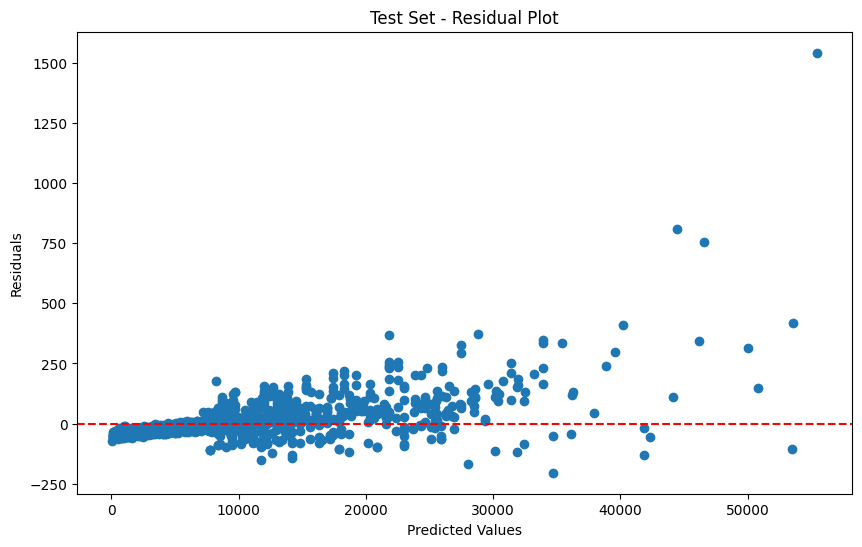

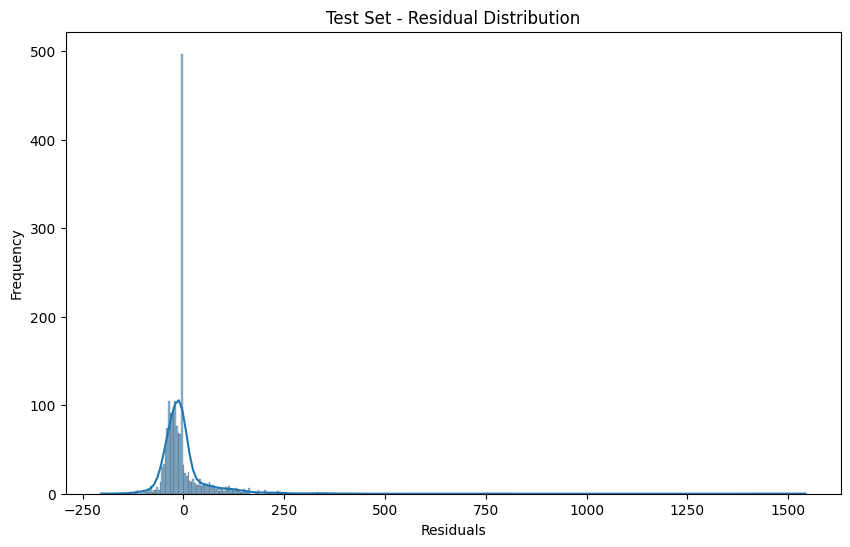


Test Set Residual Statistics:
Mean of Residuals: -0.0526
Standard Deviation of Residuals: 71.4112
Skewness of Residuals: 8.0428
Kurtosis of Residuals: 133.3122


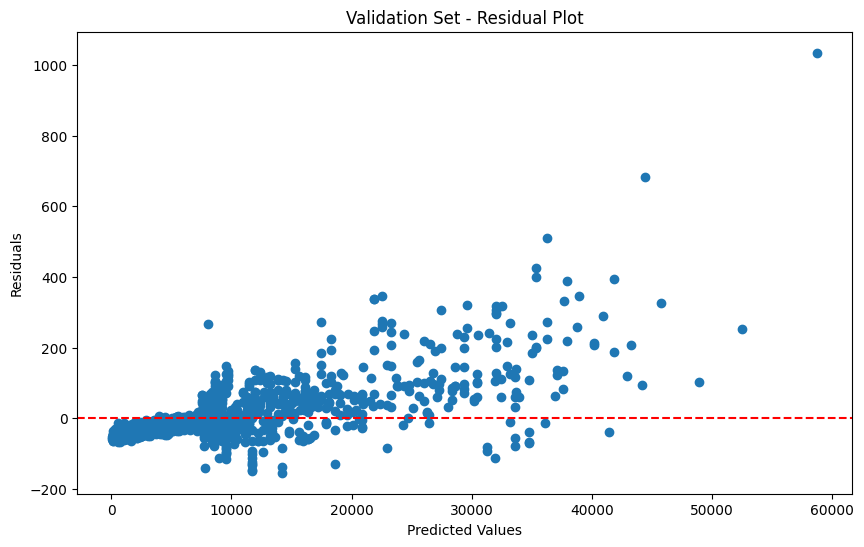

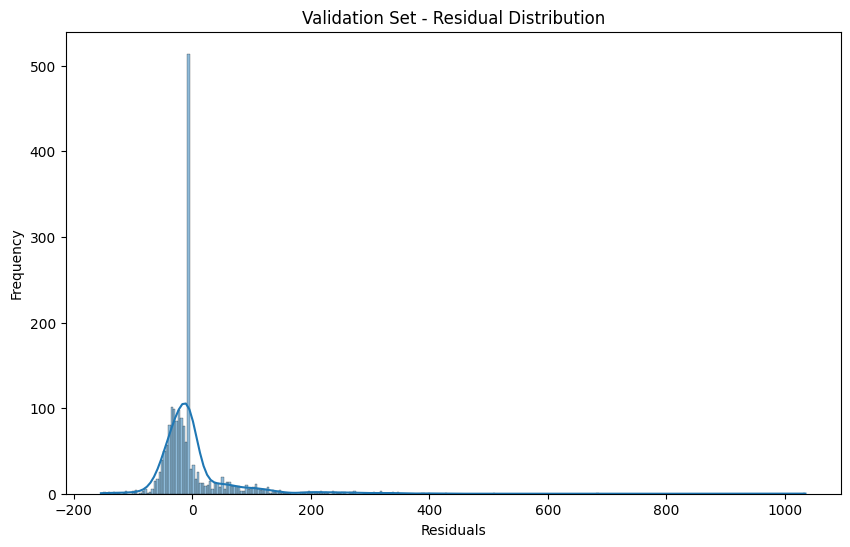


Validation Set Residual Statistics:
Mean of Residuals: 2.0449
Standard Deviation of Residuals: 69.4288
Skewness of Residuals: 4.4675
Kurtosis of Residuals: 38.2804


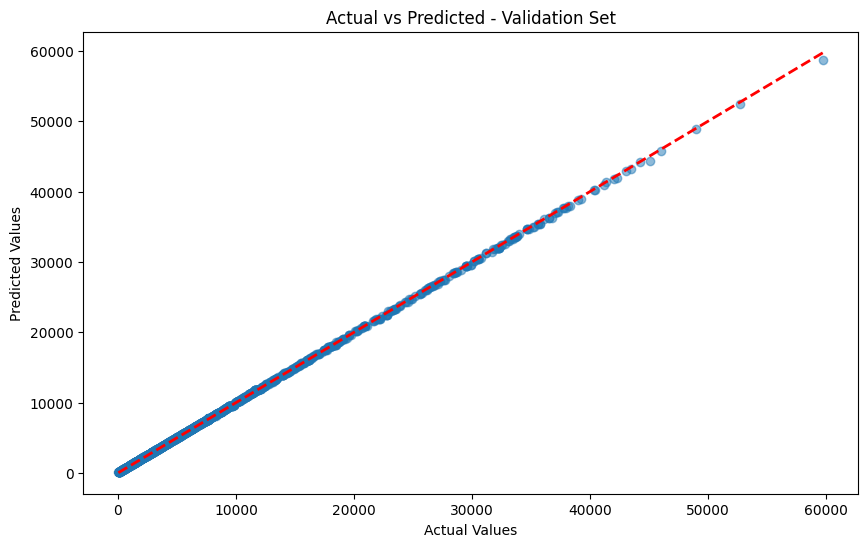

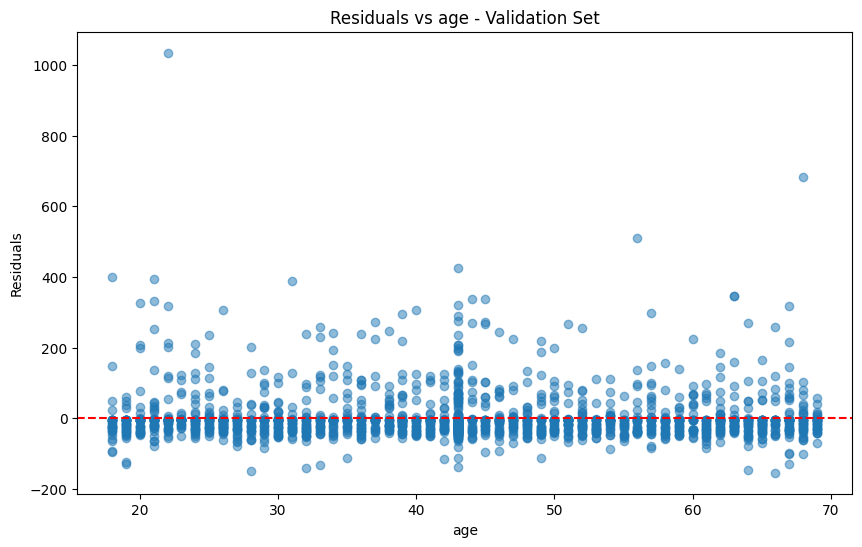

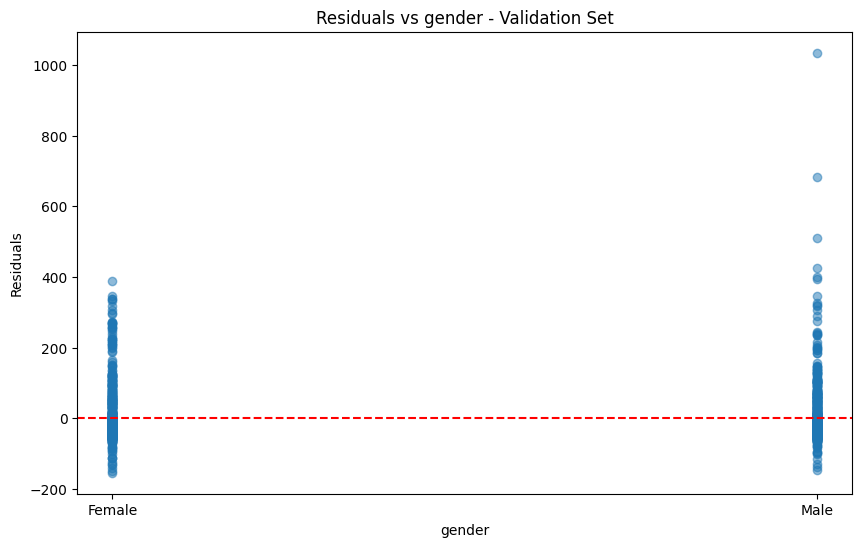

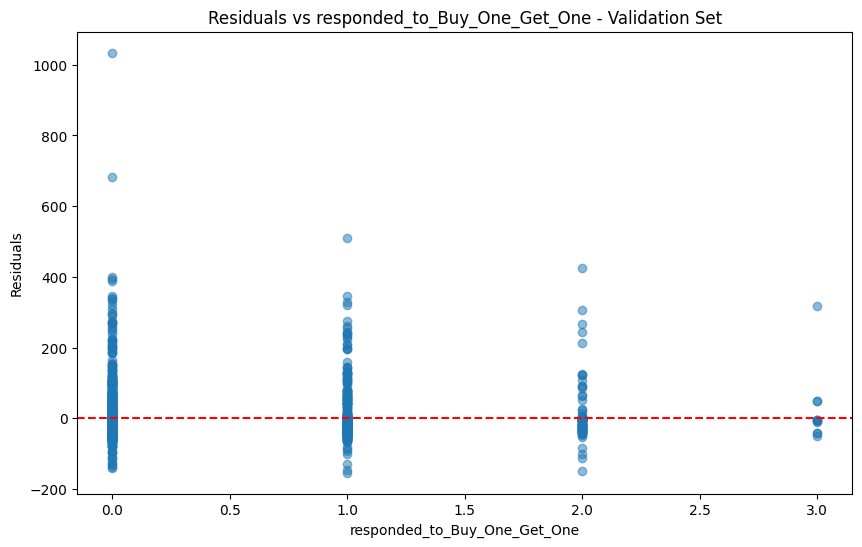

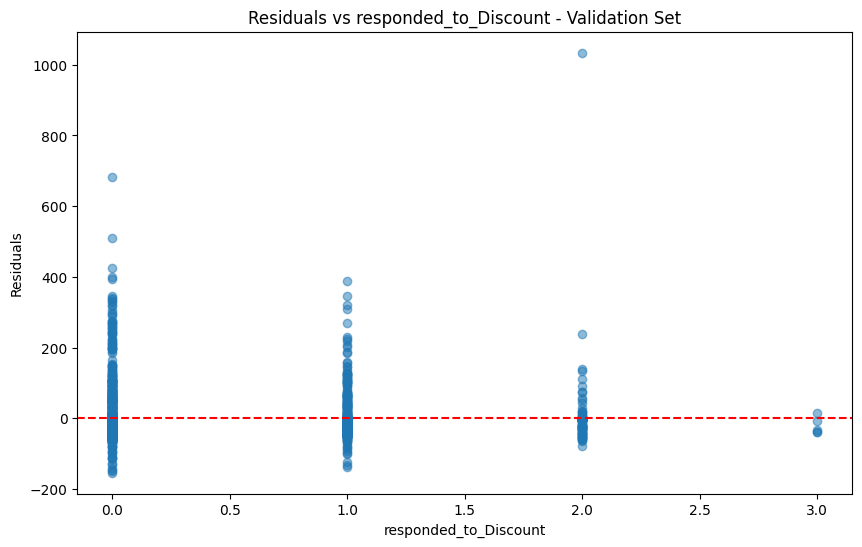

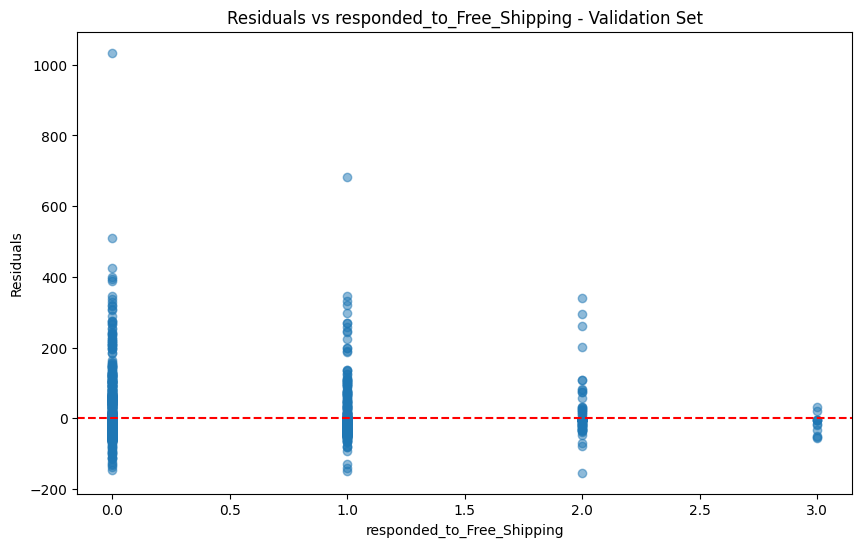

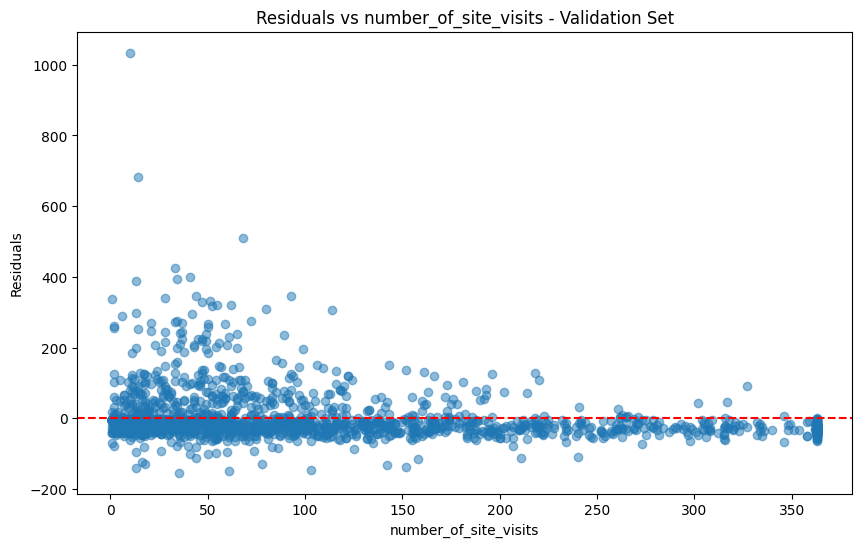

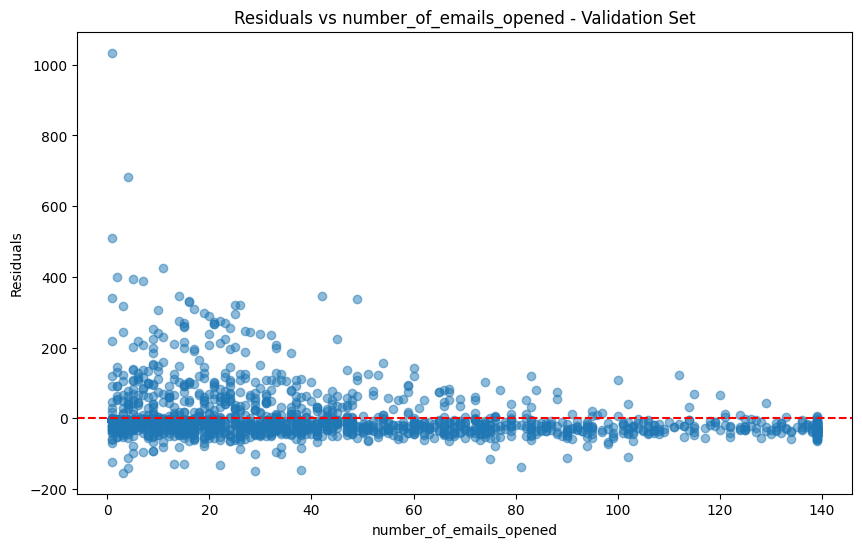

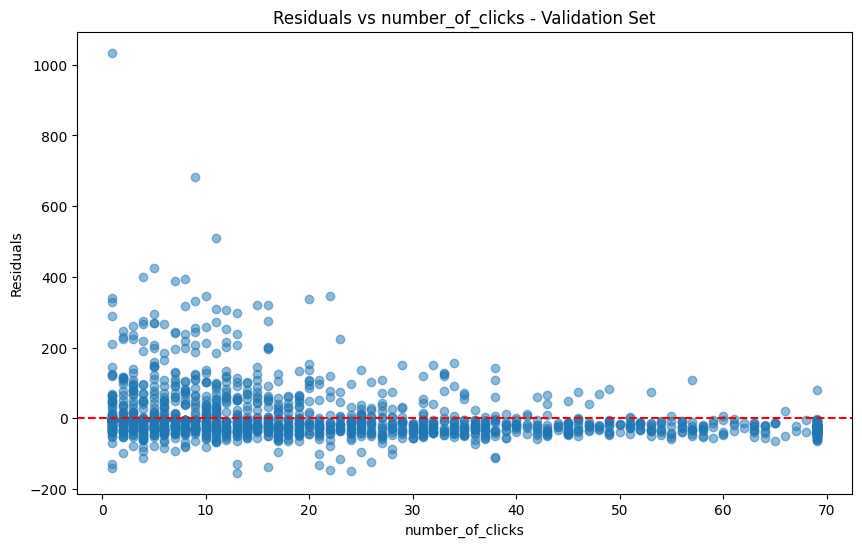

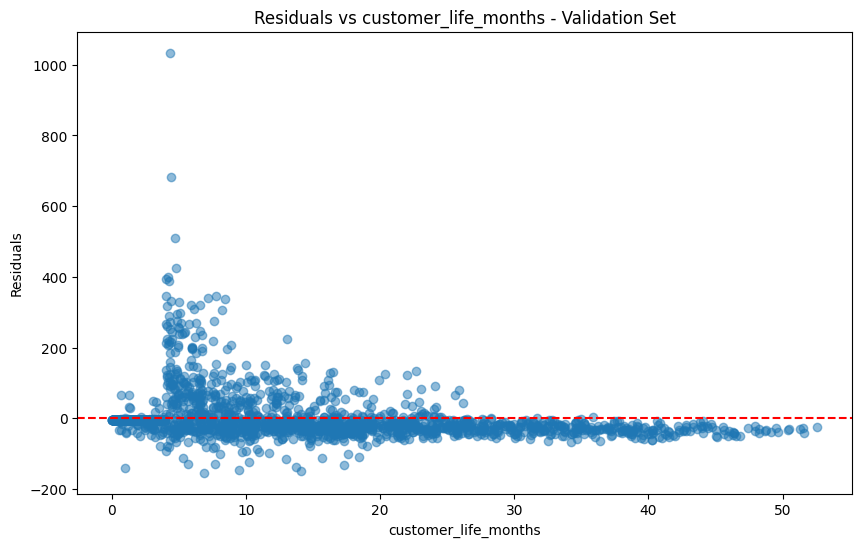

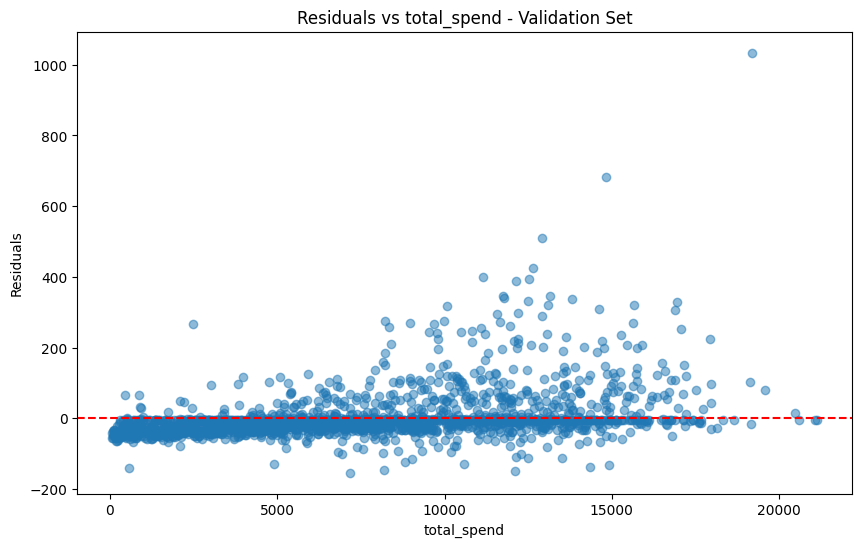

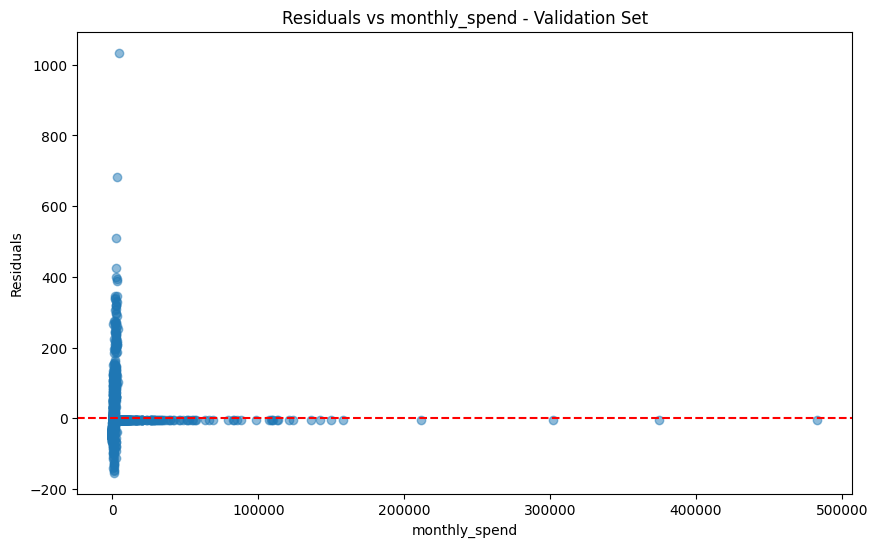

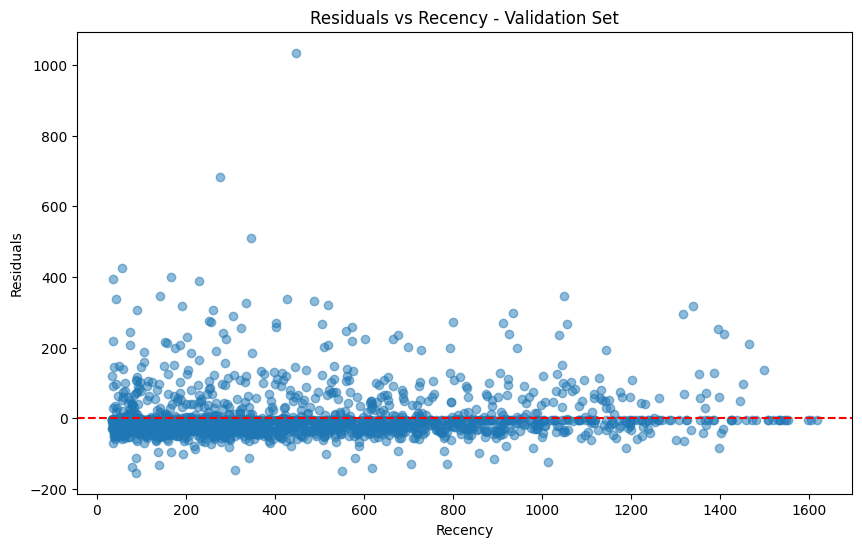

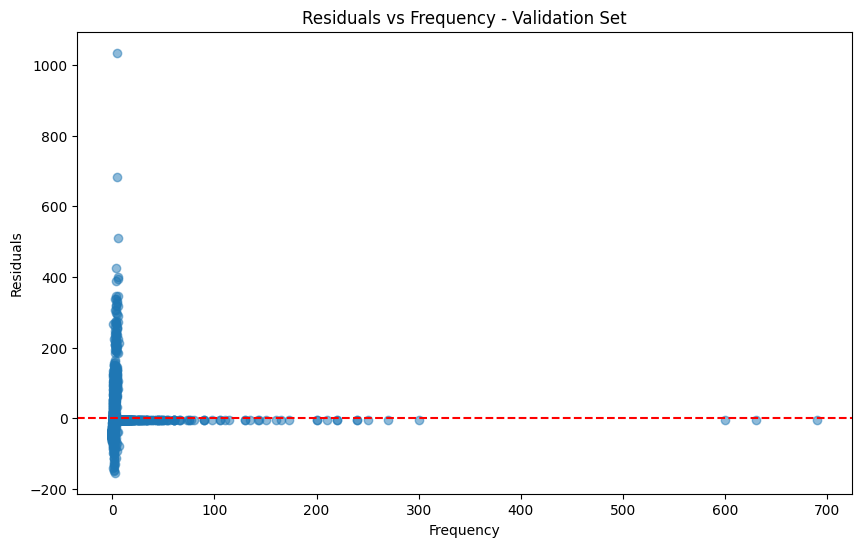

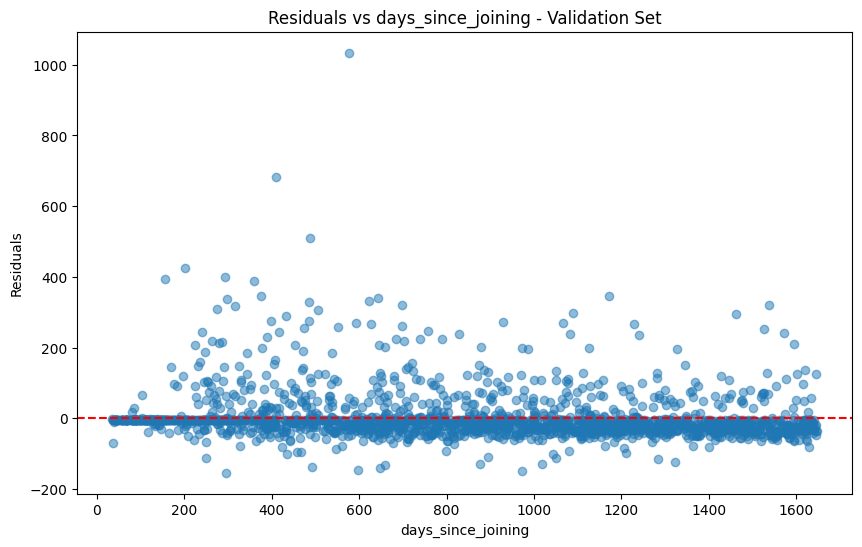

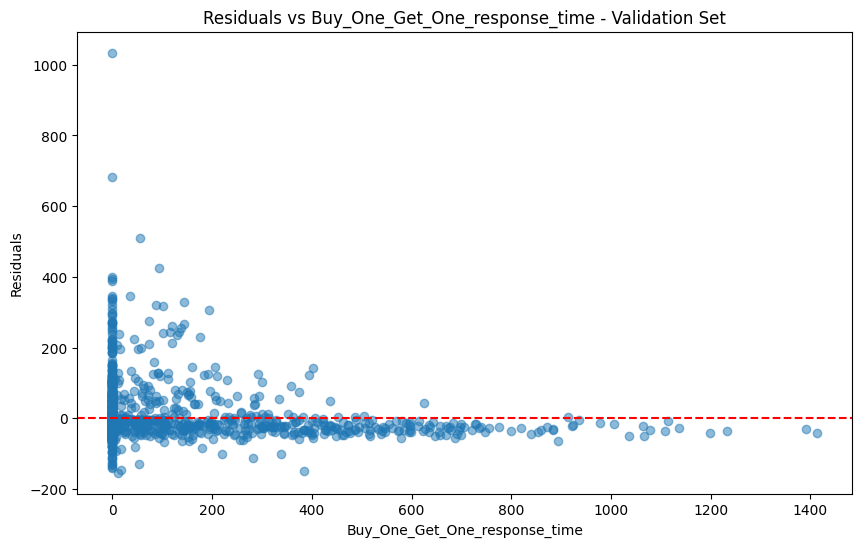

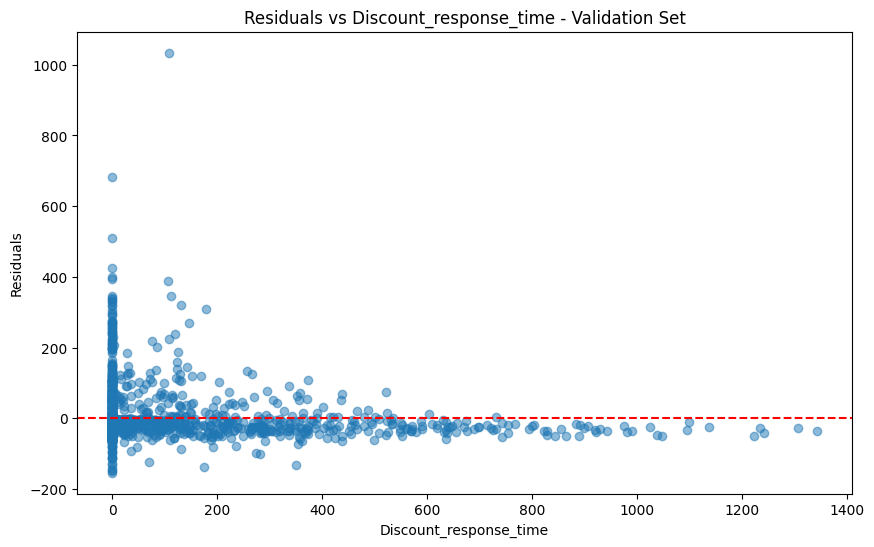

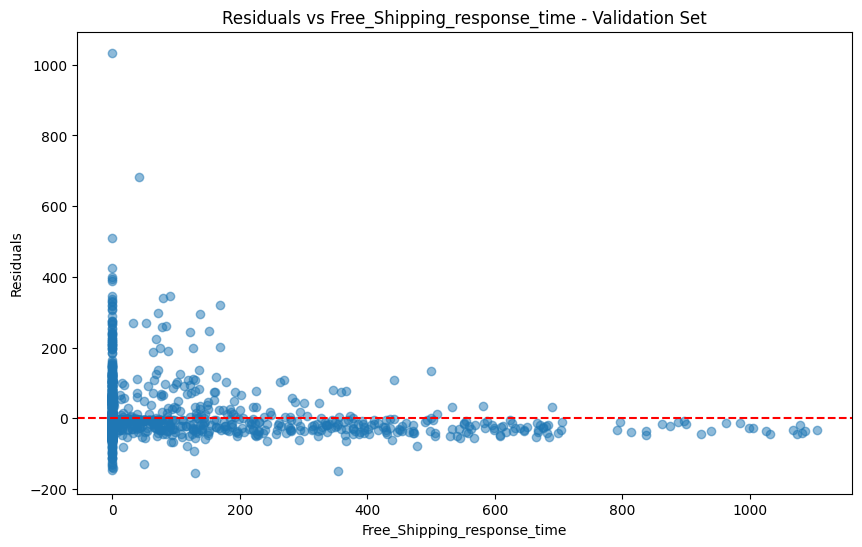

TypeError: 'value' must be an instance of str or bytes, not a float

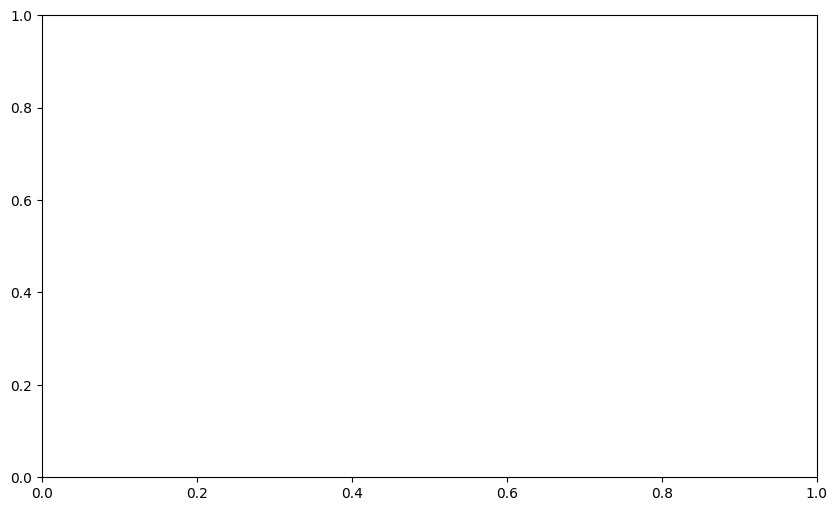

In [5]:
# Residual Analysis
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title} - Residual Plot')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'{title} - Residual Distribution')
    plt.show()

    print(f"\n{title} Residual Statistics:")
    print(f"Mean of Residuals: {np.mean(residuals):.4f}")
    print(f"Standard Deviation of Residuals: {np.std(residuals):.4f}")
    print(f"Skewness of Residuals: {pd.Series(residuals).skew():.4f}")
    print(f"Kurtosis of Residuals: {pd.Series(residuals).kurtosis():.4f}")

# Perform residual analysis for test and validation sets
plot_residuals(y_test, y_test_pred, "Test Set")
plot_residuals(y_val, y_val_pred, "Validation Set")

# Actual vs Predicted Plot for Validation Set
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Validation Set')
plt.show()

# Residuals vs Features for Validation Set
for feature in X_val.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_val[feature], y_val - y_val_pred, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs {feature} - Validation Set')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the data
url = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Assignments/Assignment%20II/Cleaned_Customers.csv"
df = pd.read_csv(url)

# Prepare features and target
X = df.drop('CLV', axis=1)
y = df['CLV']

# Split the data into train+test and validation sets right at the beginning
X_train_test, X_val, y_train_test, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train+test into separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42)

# Convert date columns to datetime
date_columns = ['join_date', 'last_purchase_date', 'Buy_One_Get_One_response_date', 
                'Discount_response_date', 'Free_Shipping_response_date']
for col in date_columns:
    X_train[col] = pd.to_datetime(X_train[col])
    X_test[col] = pd.to_datetime(X_test[col])
    X_val[col] = pd.to_datetime(X_val[col])

# Calculate time since joining
current_date = datetime.now()
for df in [X_train, X_test, X_val]:
    df['days_since_joining'] = (current_date - df['join_date']).dt.days

# Calculate response time for promotions
for df in [X_train, X_test, X_val]:
    for promo in ['Buy_One_Get_One', 'Discount', 'Free_Shipping']:
        df[f'{promo}_response_time'] = (df[f'{promo}_response_date'] - df['join_date']).dt.days

# Replace NaN with 0 for response time columns
response_time_columns = ['Buy_One_Get_One_response_time', 'Discount_response_time', 'Free_Shipping_response_time']
for df in [X_train, X_test, X_val]:
    df[response_time_columns] = df[response_time_columns].fillna(0)

# Create age bins
for df in [X_train, X_test, X_val]:
    df['age_bin'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, np.inf], 
                           labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Drop unnecessary columns
columns_to_drop = ['customer_id', 'location', 'join_date', 'last_purchase_date', 
                   'Buy_One_Get_One_response_date', 'Discount_response_date', 
                   'Free_Shipping_response_date']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)
X_val = X_val.drop(columns=columns_to_drop)

# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Prepare the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Fit the preprocessor and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_val_processed = preprocessor.transform(X_val)

# Define Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_processed, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test_processed, y_test), verbose=0)

# Make predictions
y_train_pred = model.predict(X_train_processed).flatten()
y_test_pred = model.predict(X_test_processed).flatten()
y_val_pred = model.predict(X_val_processed).flatten()

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print results
print("Neural Network Results:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R2: {test_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation R2: {val_r2:.4f}")

# Calculate average CLV
average_clv = y.mean()
print(f"\nAverage CLV: ${average_clv:.2f}")

# Calculate RMSE
val_rmse = np.sqrt(val_mse)
print(f"Validation RMSE: ${val_rmse:.2f}")

# Calculate relative error
relative_error = (val_rmse / average_clv) * 100
print(f"Relative Error: {relative_error:.2f}%")

60/60 [==============================] - 0s 628us/step
Neural Network Results:
Train MSE: 13310023.6735
Train R2: 0.7741
Test MSE: 12945186.3687
Test R2: 0.7651
Validation MSE: 14703079.9003
Validation R2: 0.7599

Average CLV: $8531.14
Validation RMSE: $3834.46
Relative Error: 44.95%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Load the data
url = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Assignments/Assignment%20II/Cleaned_Customers.csv"
df = pd.read_csv(url)

# Prepare features and target
X = df.drop('CLV', axis=1)
y = df['CLV']

# Split the data into train+test and validation sets right at the beginning
X_train_test, X_val, y_train_test, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train+test into separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42)

# Convert date columns to datetime
date_columns = ['join_date', 'last_purchase_date', 'Buy_One_Get_One_response_date', 
                'Discount_response_date', 'Free_Shipping_response_date']
for col in date_columns:
    X_train[col] = pd.to_datetime(X_train[col])
    X_test[col] = pd.to_datetime(X_test[col])
    X_val[col] = pd.to_datetime(X_val[col])

# Calculate time since joining
current_date = datetime.now()
for df in [X_train, X_test, X_val]:
    df['days_since_joining'] = (current_date - df['join_date']).dt.days

# Calculate response time for promotions
for df in [X_train, X_test, X_val]:
    for promo in ['Buy_One_Get_One', 'Discount', 'Free_Shipping']:
        df[f'{promo}_response_time'] = (df[f'{promo}_response_date'] - df['join_date']).dt.days

# Replace NaN with 0 for response time columns
response_time_columns = ['Buy_One_Get_One_response_time', 'Discount_response_time', 'Free_Shipping_response_time']
for df in [X_train, X_test, X_val]:
    df[response_time_columns] = df[response_time_columns].fillna(0)

# Create age bins
for df in [X_train, X_test, X_val]:
    df['age_bin'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, np.inf], 
                           labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Drop unnecessary columns
columns_to_drop = ['customer_id', 'location', 'join_date', 'last_purchase_date', 
                   'Buy_One_Get_One_response_date', 'Discount_response_date', 
                   'Free_Shipping_response_date']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)
X_val = X_val.drop(columns=columns_to_drop)

# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Prepare the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Fit the preprocessor and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_val_processed = preprocessor.transform(X_val)

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # Input layer
    model.add(Dense(units=hp.Int('input_units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train_processed.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(1))
    
    # Compile the model
    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Set up the Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=2,
    directory='keras_tuner',
    project_name='clv_prediction'
)

# Perform the hyperparameter search
tuner.search(X_train_processed, y_train,
             epochs=100,
             validation_data=(X_test_processed, y_test),
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
history = best_model.fit(X_train_processed, y_train, epochs=100, batch_size=32, 
                         validation_data=(X_test_processed, y_test), 
                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
                         verbose=0)

# Make predictions
y_train_pred = best_model.predict(X_train_processed).flatten()
y_test_pred = best_model.predict(X_test_processed).flatten()
y_val_pred = best_model.predict(X_val_processed).flatten()

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print results
print("Tuned Neural Network Results:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R2: {test_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation R2: {val_r2:.4f}")

# Calculate average CLV
average_clv = y.mean()
print(f"\nAverage CLV: ${average_clv:.2f}")

# Calculate RMSE
val_rmse = np.sqrt(val_mse)
print(f"Validation RMSE: ${val_rmse:.2f}")

# Calculate relative error
relative_error = (val_rmse / average_clv) * 100
print(f"Relative Error: {relative_error:.2f}%")

# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(tuner.get_best_hyperparameters()[0].values)

Trial 17 Complete [00h 00m 32s]
val_loss: 6066024.25

Best val_loss So Far: 4411111.25
Total elapsed time: 00h 12m 10s

Search: Running Trial #18

Value             |Best Value So Far |Hyperparameter
512               |224               |input_units
0                 |0.1               |dropout_1
1                 |1                 |num_layers
160               |448               |units_0
0.2               |0                 |dropout_2
0.00079614        |0.0014113         |learning_rate
128               |128               |units_1
0                 |0.2               |dropout_3
320               |384               |units_2
0.1               |0.1               |dropout_4
128               |128               |units_3
0.3               |0.2               |dropout_5

Epoch 1/100
178/178 [==============================] - 1s 2ms/step - loss: 121096424.0000 - mae: 8013.1138 - val_loss: 81378064.0000 - val_mae: 6062.6743
Epoch 2/100
178/178 [==============================] - 0s 2ms/step - l

KeyboardInterrupt: 